# Zadanie

Weźmy na przykład przypadek, w którym chcemy porównać dokładność dwóch metod. Z testem chcemy określić, czy dokładność obu metod jest równoważna, czy też jedna metoda jest lepsza.

Mamy następujące wyniki:
Próbka 1: 

$[20.7, 20.3, 20.3, 20.3, 20.7, 19.9, 19.9, 19.9, 20.3, 20.3, 19.7, 20.3]$

Próbka 2: 

$[19.7, 19.4, 20.1, 18.6, 18.8, 20.2, 18.7, 19.0]$

Statystyką F-Snedecora wynosi $F=0.244$ i ma stopnie swobody równe $n-1$ i $m-1$, gdzie $n$ i $m$ są licznościami próbek. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
import seaborn as sns

In [11]:
method1 = np.array([20.7, 20.3, 20.3, 20.3, 20.7, 19.9, 19.9, 19.9, 20.3, 20.3, 19.7, 20.3])
method2 = np.array([ 19.7, 19.4, 20.1, 18.6, 18.8, 20.2, 18.7, 19. ])

Jeżeli $(X_1,\ldots,X_n)$ jest próbką prostą z rozkładu $N(\mu_1,\sigma_1^2)$, a $(Y_1,\ldots,Y_m)$ jest niezależną próbką prostą z rozkładu $N(\mu_2,\sigma_2^2)$ to zmienna losowa
$$
F=\frac{ \frac{1}{n-1}  \sum_{i=1}^{n} (X_i - \bar X)^2 }{\frac{1}{m-1}  \sum_{i=1}^{m} (X_i - \bar X)^2 }
$$
gdzie
$$
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_i, \quad \bar Y = \frac{1}{m} \sum_{i=1}^{m} Y_i
$$
ma rozkład $F(m-1,n-1)$ (F-Snedecora).

Definiujemy zmienną losową o rozkładzie F-Snedecora $F(m-1,n-1)$

In [12]:
d1=len(method1)
d2=len(method2)
X=stats.f(d1-1,d2-1)

Definiujemy statystykę

In [13]:
fval = np.var(method1, ddof=1)/np.var(method2, ddof=1)
print(fval)

0.243934673841


Liczymy wartość dystrybuanty w odpowiednim punkcie

In [14]:
p_oneTail = X.cdf(fval) # -> 0.019
print(p_oneTail)

0.0186651699314


Statystyka $F$ znajduje się w ogonie ($p_{oneTail} = 0.019$), więc odrzucamy hipotezę że obie metody mają taką samą precyzję.


Zaznaczmy nasze wartości na wykresie gęstości i dystrybuanty rozkłady F 

0.0187


D:\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1415: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * log(m) + n/2 * log(n) + (n/2 - 1) * log(x)


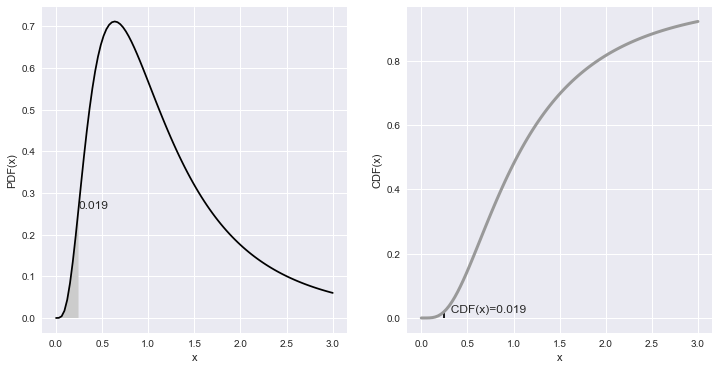

In [15]:
x0=fval

(inte,err)=integrate.quad(lambda x: X.pdf(x), 0, x0)
print(np.round(inte,4))

x = np.linspace(0,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(0, x0)
y1 = X.pdf(x1)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(x0, X.pdf(x0), np.round(inte,3))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(x0, X.cdf(x0), r'  CDF(x)=%1.3f' % np.round(X.cdf(x0),3))
plt.vlines(x0, 0, X.cdf(x0), linestyles='--')
plt.show()